Coded up a Wigner function class in `rotations.py` file.

In [1]:
%display latex

In [2]:
%load_ext autoreload
%autoreload 2

In [61]:
from rotations import Wigner
from utils import checkMUBs

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [2, 2]

In [62]:
w23 = Wigner(3)

In [63]:
# check that base is self-dual
for k in w23.basis:
    for l in w23.basis:
        if k == l:
            if (k * l).trace() != 1:
                raise Exception('Not self-dual!')
        else:
            if (k * l).trace() != 0:
                raise Exception('Not self-dual!')

Quick checking. First we verify that the rotation operators do indeed give us MUBs.

In [64]:
m = checkMUBs(w23.mubs)

MUBs are good!


Now let's test the kernels.

In [67]:
w = w23.WignerMatrix(w23.Proj(w23.mubs[4][:,0]), ker='wootters')
np.round(w, 3)

array([[ 0.125, -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ],
       [-0.   , -0.   , -0.   , -0.   ,  0.125, -0.   , -0.   , -0.   ],
       [-0.   , -0.   , -0.   , -0.   , -0.   ,  0.125, -0.   , -0.   ],
       [-0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,  0.125, -0.   ],
       [-0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,  0.125],
       [-0.   ,  0.125, -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ],
       [-0.   , -0.   ,  0.125, -0.   , -0.   , -0.   , -0.   , -0.   ],
       [-0.   , -0.   , -0.   ,  0.125, -0.   , -0.   , -0.   , -0.   ]])

Let's verify that the two kernels are equal.

In [74]:
# this takes a while 'cause SageMath is slow...
for k in w23.F:
    for l in w23.F:
        if not np.allclose(w23.Wootters(k,l), w23.Delta(k,l)):
            raise Exception('Not the same!', k, l)

In [75]:
ghz = (w23.Id[:,0] + w23.Id[:,-1])/np.sqrt(2)
w = w23.WignerMatrix(w23.Proj(ghz), ker='wootters')

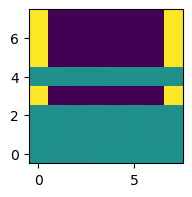

In [76]:
plt.imshow(w, origin='lower')